# deskripsi data

### dataset yang digunakan terdiri dari acara tv dan film yang tersedia di netflix pada tahun 2019

### data ini berisi 12 variabel yang nantinya akan diseleksi lagi menadi beberapa variabel yang berguna

# Hipotesis awal

 #### jenis tayangan di netflix dapat dipengaruhi berdasarkan:
 + type
 + director
 + country 
 + listed_in
 + rating
 + released year
 + duration 
 

# Importing libraries

In [12]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr


# Importing data

In [39]:
data = pd.read_csv('Kelompok 4 Netflix Shows.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data overview

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [41]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

seperti yang kita lihat, terdapat banyak missing value di kolom director, cast, country. saya akan menghapus kolom director karena untuk mengisi missing value sangat tidak memungkinkan, begitu juga dengan kolom cast saya akan menghapusnya. untuk kolom country saya akan menggunakan data yang tersedia 

In [42]:
data.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s4460,Movie,Cloudy with a Chance of Meatballs 2,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# Missing value

In [43]:
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['date_added'] = data['date_added'].fillna(data['date_added'].mode()[0])
data['rating'] = data['rating'].fillna(data['country'].mode()[0])


In [44]:
data.drop(['cast','director'],axis='columns',inplace=True)

In [45]:
data.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [46]:
data.duplicated().sum()

0

seluruh missing value telah dihilangkan atau diisi sehingga tidak ada missing value yang tersisa

# Data Visualization

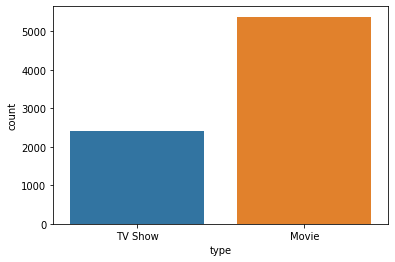

In [49]:
s = sns.countplot(x = "type", data= data) 

Text(0.5, 1.0, 'JENIS TAYANGAN NETFLIX')

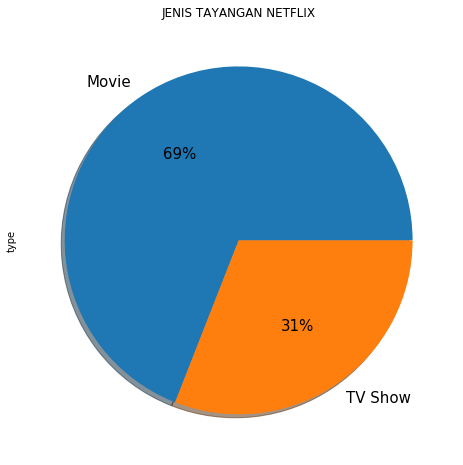

In [56]:
x= data.groupby(data['type'])['type'].count().sort_values(ascending = False).head(5)
plt.figure(figsize=(12,8))
plt.subplot()
x.plot.pie(autopct = '%1.f%%', shadow = True, fontsize =15)
plt.title("JENIS TAYANGAN NETFLIX")

seperti yang dapat kita lihat, konten tanyangan di netflix terdiri dar 69% movie dan 31% TV Show

Text(0.5, 1.0, 'NEGARA TERBANYAK')

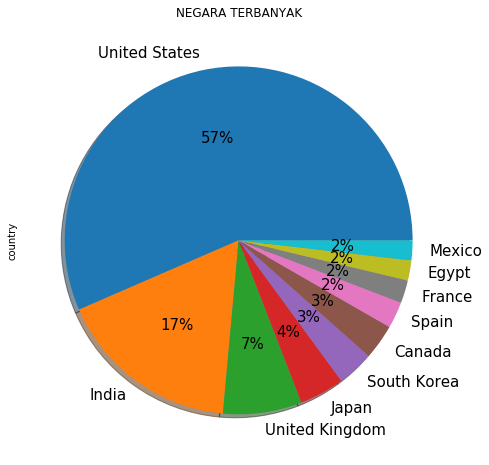

In [57]:
Country = data.groupby(data['country'])['country'].count().sort_values(ascending = False).head(10)
plt.figure(figsize=(12,8))
plt.subplot()
Country.plot.pie(autopct = '%1.f%%', shadow = True, fontsize = 15)
plt.title("NEGARA TERBANYAK")

In [58]:
negara= data['country'].value_counts().head(10)
negara

United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: country, dtype: int64